### Linear regression: 
* creates a best fit line, such that the distance betwen true and predicted point is minimal.
* eqn: hθ(x)=θo+θ1x, intercept is to move the line from origin, slope is unit movement in y axis wrt x axis.
* cost function: measures the difference between truth and predicted value in the forward pass.
* convergence algorithm: optimise the changes in parameters.
1. The derivative of the cost function is partial derivation, for all the params.
2. we get slope of the line (derivative) and based on +- we add or subtract to reach the global minima.
3. we use alpha the learning rate to control the speed at which the convergence should happen. A default of 1e-3 is used in most of the algos.
![Alt text](image-1.png)

4. we use mse as loss function becuase it is a quadratic function, which is differentiable and will have 1 global or local minima.
5. ordinary least square derives the eqn to calculate the intercept and coefficient.

6. Metrics:
- mse: has 1 local and global minima, is differentiable.
- mse: not rocust to outliers, it is not in same unit.
- mae: robust to outliers, it is in same unit.
- mae: convergence takes time, as it required subgradients as it cannot differentiate at 0.
- rmse: same unit, differentiable
- rmse: not robust to outliers.
- r2 and adj r2 is for model perofrmance.
- r2 = 1 - SSres / SStot. SSres = y - y^, SStot = y - y_ (avg of all points).
- r2: since the line passes close to the actual points the numerator should be small and 1 - that will give us the performance of the model.
- adj r2: the r2 increases with an increase in # of features, and therefore we use adj r2.
- adj r2:   1 - (1-R2)(N-1) / N-p-1. The adj r2 penalises the r2 for the number of features, and we get less score if an uncorrelated feature was added.  

7. Assumptions
- No Multicolinearlity in the data: predictor variables should not be correlated among themselves
- Homoscedasticity of Residuals or Equal Variances: spread residuals should be qually spaced: can be verfied with a scatter plot
- No Autocorrelation in residuals: the residual is indepent of the previous residual.
- Predictors are distributed Normally
- relationship between the independent and dependent variables should be linear
https://www.analyticsvidhya.com/blog/2016/07/deeper-regression-analysis-assumptions-plots-solutions/

8. Regression Analysis:
coefficient of ols.


In [55]:
%env PYTORCH_ENABLE_MPS_FALLBACK=1

env: PYTORCH_ENABLE_MPS_FALLBACK=1


In [1]:
import torch
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

tensor([1.], device='mps:0')


/opt/homebrew/Caskroom/miniforge/base/envs/prac_env/lib/python3.8/site-packages/torch/_tensor_str.py:115: UserWarning: The operator 'aten::nonzero' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/miniforge3/conda-bld/pytorch-recipe_1670076299818/work/aten/src/ATen/mps/MPSFallback.mm:11.)
  nonzero_finite_vals = torch.masked_select(


### linear regression with pytorch
1. design model (input, output size, forward pass)
2. construct loss and optimiser
3. training loop:
    - forward pass : compute predictions and loss
    - backward pass : gradients
    - update weights

In [6]:
import torch
import torch.nn as nn
from sklearn import datasets
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [10]:
import numpy as np

In [14]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')
inputs

array([[ 73.,  67.,  43.],
       [ 91.,  88.,  64.],
       [ 87., 134.,  58.],
       [102.,  43.,  37.],
       [ 69.,  96.,  70.]], dtype=float32)

In [16]:
targets = np.array([[56,], 
                    [81, ], 
                    [119, ], 
                    [22,], 
                    [103,]], dtype='float32')
targets

array([[ 56.],
       [ 81.],
       [119.],
       [ 22.],
       [103.]], dtype=float32)

In [28]:
x_data = torch.Tensor(inputs)
y_data = torch.Tensor(targets)

In [44]:
x_data = Variable(x_data)
y_data = Variable(y_data)


In [47]:
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

dataset = TensorDataset(x_data, y_data)
n_samples, n_features = x_data.shape
batch_size = 2
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

In [48]:
for inp,target in train_loader:
    print(inp)
    print(target)
    print('---')

tensor([[73., 67., 43.],
        [91., 88., 64.]])
tensor([[56.],
        [81.]])
---
tensor([[ 87., 134.,  58.],
        [102.,  43.,  37.]])
tensor([[119.],
        [ 22.]])
---
tensor([[69., 96., 70.]])
tensor([[103.]])
---


In [49]:
train_loader.batch_size

2

In [50]:
w = torch.randn(batch_size, n_features, requires_grad=True)
b = torch.randn(batch_size, requires_grad=True)
print(w)
print(b)

tensor([[-0.3600,  1.3603,  0.0490],
        [-1.0603,  0.1335,  0.0641]], requires_grad=True)
tensor([1.1718, 0.5771], requires_grad=True)


In [51]:
def model(X):
    return X @ w.t() + b #@: matrix multiplication


In [56]:
def mse_loss(predictions, targets):
    difference = predictions - targets
    return torch.sum(difference * difference)/ difference.numel() # difference.numel(), number of elems = len

In [57]:
for x,y in train_loader:
    preds = model(x)
    print("Prediction is :n",preds)
    print("nActual targets is :n",y)
    print("nLoss is: ",mse_loss(preds, y))
    break

Prediction is :n tensor([[ 68.1365, -65.1205],
        [ 91.2508, -80.0553]], grad_fn=<AddBackward0>)
nActual targets is :n tensor([[56.],
        [81.]])
nLoss is:  tensor(10215.3398, grad_fn=<DivBackward0>)


In [67]:
mse_loss(preds, y).backward()

In [71]:
epochs = 2
lr = 1e-3
for i in range(epochs):
    for x,y in train_loader:
        preds = model(x)
        loss = mse_loss(preds,y)
        loss.backward()
        with torch.no_grad():
            w -= w.grad * lr
            b -= b.grad * lr
            # Set the gradients to zero
            w.grad.zero_()
            b.grad.zero_()
    print(f"Epoch {i}/{epochs}: Loss: {loss}")

Epoch 0/2: Loss: nan
Epoch 1/2: Loss: nan


In [72]:
for x,y in train_loader:
    preds = model(x)
    print("Prediction is :n",preds)
    print("nActual targets is :n",y)
    break

Prediction is :n tensor([[nan, nan],
        [nan, nan]], grad_fn=<AddBackward0>)
nActual targets is :n tensor([[56.],
        [81.]])


#to lear:
1. complte the linear regression with pytorch
1. complete the linear regression with pytorch nn
2. complete the linear regression without pytorch
3. complete the linear regresson with least sqaure mwthod
4. complete he linear regression metric
5. complete the linear regression analysis.

In [56]:
import matplotlib.pyplot as plt

In [57]:
import torch
from torch.autograd import Variable
class LinearRigression(torch.nn.Module):
    def __init__(self, inputsize,outputsize) -> None:
        super(LinearRigression, self).__init__()
        self.linear = torch.nn.Linear(inputsize,outputsize)# numbr of features
    
    def forward(self,x):
        out = self.linear(x)
        return out

In [58]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 100
model = LinearRigression(inputDim,outputDim)
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    model.to(mps_device)

In [59]:
[i for i in model.parameters()]

[Parameter containing:
 tensor([[-0.1871]], device='mps:0', requires_grad=True),
 Parameter containing:
 tensor([0.3203], device='mps:0', requires_grad=True)]

In [60]:
criterion = torch.nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(),learningRate)

In [61]:
import numpy as np
# create dummy data for training
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [62]:
x_ = Variable(torch.tensor(x_train))
y_ = Variable(torch.tensor(y_train))
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x_ = x_.to(mps_device)
    y_ = y_.to(mps_device)

In [32]:
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

dataset = TensorDataset(x_, y_)
n_samples, n_features = x_.shape
batch_size = 2
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

In [ ]:
for x,y in train_loader:
    print(x)
    print(y)
    print('---')

In [ ]:
for epoch in range(epochs):
    for x,y in train_loader:
        # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
        optimiser.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        # get gradients w.r.t to parameters
        loss.backward()
        # update parameters
        optimiser.step()
        print('epoch {}, loss {}'.format(epoch, loss.item()))

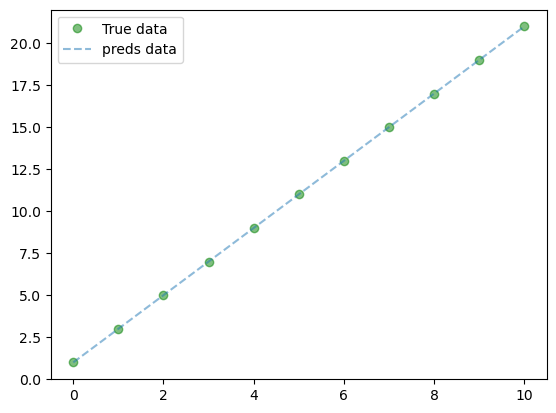

In [45]:
with torch.no_grad():
    preds  = model(x_)

plt.clf()
plt.plot(x_train,y_train,'go',label='True data', alpha=0.5)
plt.plot(x_train,preds.to('cpu'),'--',label='preds data', alpha=0.5)
plt.legend(loc='best')
plt.show()

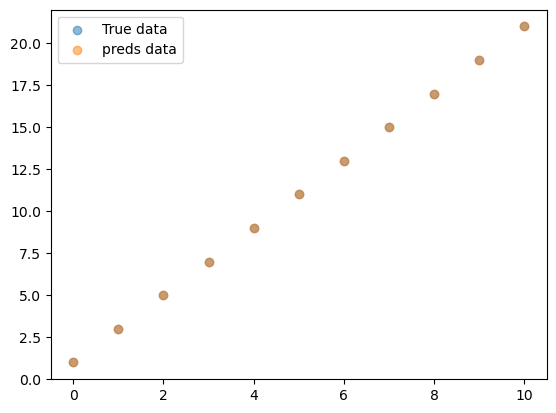

In [46]:
plt.scatter(x_train,y_train,label='True data', alpha=0.5)
plt.scatter(x_train,preds.to('cpu'),label='preds data', alpha=0.5)
plt.legend(loc='best')
plt.show()

## for muliple linear regression


In [79]:
x = np.array([
    [1,2],
    [1,3],
    [2,3],
    [2,4],
    [1,4],
    [2,3],
    [5,3],
    [5,3],
    [2,3],
])
y = np.array([
    [1,2],
    [1,3],
    [2,3],
    [2,4],
    [1,4],
    [2,3],
    [5,3],
    [5,3],
    [2,3],
])

In [80]:
x_ = Variable(torch.tensor(x,dtype=torch.float32))
y_ = Variable(torch.tensor(y,dtype=torch.float32))
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x_ = x_.to(mps_device)
    y_ = y_.to(mps_device)

In [81]:
inputDim = 2        # takes variable 'x' 
outputDim = 2       # takes variable 'y'
learningRate = 0.01 
epochs = 10
model = LinearRigression(inputDim,outputDim)
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    model.to(mps_device)

In [83]:
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

dataset = TensorDataset(x_, y_)
n_samples, n_features = x_.shape
batch_size = 2
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

In [84]:
for x,y in train_loader:
    print(x)
    print(y)
    print('---')

tensor([[1., 2.],
        [1., 3.]], device='mps:0')
tensor([[1., 2.],
        [1., 3.]], device='mps:0')
---
tensor([[2., 3.],
        [2., 4.]], device='mps:0')
tensor([[2., 3.],
        [2., 4.]], device='mps:0')
---
tensor([[1., 4.],
        [2., 3.]], device='mps:0')
tensor([[1., 4.],
        [2., 3.]], device='mps:0')
---
tensor([[5., 3.],
        [5., 3.]], device='mps:0')
tensor([[5., 3.],
        [5., 3.]], device='mps:0')
---
tensor([[2., 3.]], device='mps:0')
tensor([[2., 3.]], device='mps:0')
---


In [85]:
for epoch in range(epochs):
    for x_train,y_train in train_loader:
        # Clear gradient buffers because we don't want any_train gradient from previous epoch to carry_train forward, dont want to cummulate gradients
        optimiser.zero_grad()
        outputs = model(x_train)
        loss = criterion(outputs, y_train)
        # get gradients w.r.t to parameters
        loss.backward()
        # update parameters
        optimiser.step()
        print('epoch {}, loss {}'.format(epoch, loss.item()))


epoch 0, loss 4.042680263519287
epoch 0, loss 8.632830619812012
epoch 0, loss 8.121474266052246
epoch 0, loss 9.644866943359375
epoch 0, loss 6.350061893463135
epoch 1, loss 4.042680263519287
epoch 1, loss 8.632830619812012
epoch 1, loss 8.121474266052246
epoch 1, loss 9.644866943359375
epoch 1, loss 6.350061893463135
epoch 2, loss 4.042680263519287
epoch 2, loss 8.632830619812012
epoch 2, loss 8.121474266052246
epoch 2, loss 9.644866943359375
epoch 2, loss 6.350061893463135
epoch 3, loss 4.042680263519287
epoch 3, loss 8.632830619812012
epoch 3, loss 8.121474266052246
epoch 3, loss 9.644866943359375
epoch 3, loss 6.350061893463135
epoch 4, loss 4.042680263519287
epoch 4, loss 8.632830619812012
epoch 4, loss 8.121474266052246
epoch 4, loss 9.644866943359375
epoch 4, loss 6.350061893463135
epoch 5, loss 4.042680263519287
epoch 5, loss 8.632830619812012
epoch 5, loss 8.121474266052246
epoch 5, loss 9.644866943359375
epoch 5, loss 6.350061893463135
epoch 6, loss 4.042680263519287
epoch 6,

In [89]:
y

tensor([[2., 3.]], device='mps:0')

In [87]:
preds

tensor([[ 1.5759, -0.1618],
        [ 1.7405, -0.2584],
        [ 2.4431, -0.5361],
        [ 2.6077, -0.6327],
        [ 1.9051, -0.3551],
        [ 2.4431, -0.5361],
        [ 4.5509, -1.3690],
        [ 4.5509, -1.3690],
        [ 2.4431, -0.5361]], device='mps:0')

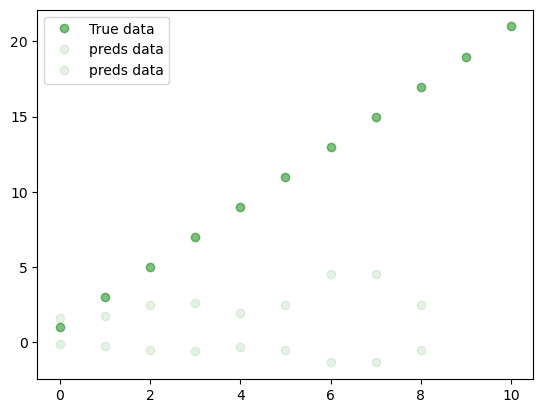

In [86]:
with torch.no_grad():
    preds  = model(x_)

plt.clf()
plt.plot(y_train,'go',label='True data', alpha=0.5)
plt.plot(preds.to('cpu'),'go',label='preds data', alpha=0.1)
plt.legend(loc='best')
plt.show()

### Ridge Regression:
1. The regularisation is added to the cost function to overcome the overffing problem of the model.
2. The L1 regularisation or ridge regression addds .
3. It shrinks the parameters. Therefore, it is used to prevent multicollinearity.
4. standardize the variables (both dependent and independent)
The bias increases as λ increases.
The variance decreases as λ increases.
distribution of errors to be normal need not be assumed
